<a href="https://colab.research.google.com/github/xing-wang-kai/ML_HIPERPARAMETROS_ALEATORIEDADE/blob/main/HIperparametros_com_GRIDSEARCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install graphviz==0.9
!pip install pydot
!pip install seaborn==0.13.2 --force
!apt-get install graphviz

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached pandas-2.2.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
  Using cached matplotlib-3.8.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Using cached contourpy-1.2.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (305 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached fonttools-4.51.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.6 MB)
  Using cached kiwisolver-1.4.5-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached packaging-24.0-py3-none-any.whl (53 kB)
  Using cached pillow-10.3.0-cp310-cp310-manylinux_2_28_x86_64.whl (4.5 MB)
  Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Using cached pytz-2024.1-py2.py3

Reading package lists... Done
^C


# Machine Learning
## otimização de modelos através de hiperparâmetros

* Entender os hiperparâmetros e os espaços de parâmetros
* Explorar o espaços de forma determinística
* Otimize modelos
* Evitar overfit
* Implementar a explorações por trás dos panos
* Utilizar a explorar com o GridSearchCV
* Nested cross validation

In [2]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"

dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)

dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [4]:
dados_azar = dados.sort_values('vendido', ascending=True).copy()
x_azar = dados_azar[['preco', 'idade_do_modelo', 'km_por_ano']]
y_azar  = dados_azar[['vendido']]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [5]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

dummy_model = DummyClassifier(random_state=200)
dummy_results = cross_validate(dummy_model, x_azar, y_azar, cv=10, return_train_score=True)
dum_median = dummy_results['test_score'].mean()
dum_std = dummy_results['test_score'].std()
dum_q1 = ((dum_median - 2*dum_std)*100).round(2)
dum_q2 = ((dum_median + 2*dum_std)*100).round(2)

print(f'Accuracia está entre [ {dum_q1} (%) e {dum_q2}  (%)]')
print(f'MEDIAN {dum_median}')
print(f"STD: {dum_std}")

Accuracia está entre [ 58.0 (%) e 58.0  (%)]
MEDIAN 0.58
STD: 0.0


In [6]:
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

tree_model = DecisionTreeClassifier(max_depth=2)
tree_results = cross_validate(tree_model, x_azar, y_azar, cv=10, return_train_score=True)
print(f"SCORE results = {tree_results}")

tree_median = tree_results['test_score'].mean()
tree_std = tree_results['test_score'].std()
tree_q1 = ((tree_median - 2*tree_std)*100).round(2)
tree_q2 = ((tree_median + 2*tree_std)*100).round(2)

print(f"ACCURRACY DO MODEL FOI ENTRE [ {tree_q1} (%) | {tree_q2} (%)]")
print(f'MEDIAN = {tree_median}')
print(f'STD = {tree_std}')

SCORE results = {'fit_time': array([0.01027703, 0.0140729 , 0.00937533, 0.00989699, 0.00960302,
       0.0093205 , 0.01172924, 0.00961113, 0.01031303, 0.00985932]), 'score_time': array([0.00449467, 0.00422716, 0.00385571, 0.00405312, 0.00395513,
       0.00391555, 0.00401258, 0.00393438, 0.0036695 , 0.00386739]), 'test_score': array([0.744, 0.759, 0.763, 0.765, 0.754, 0.742, 0.771, 0.748, 0.764,
       0.768]), 'train_score': array([0.75944444, 0.75777778, 0.75733333, 0.75711111, 0.75833333,
       0.75966667, 0.75644444, 0.759     , 0.75722222, 0.75677778])}
ACCURRACY DO MODEL FOI ENTRE [ 73.83 (%) | 77.73 (%)]
MEDIAN = 0.7578
STD = 0.009734474818910375


In [7]:
# GERANDO MODELO ALEATÓRIO DO CARRO PARA AGRUPAR DADOS.

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [8]:
def print_results( results ):
  median = results['test_score'].mean()
  std = results['test_score'].std()
  q1 = ((median - 2*std)*100).round(2)
  q2 = ((median + 2*std)*100).round(2)

  print(f"ACCURRACY DO MODEL FOI ENTRE \033[47m \033[30m [ {q1} (%) | {q2} (%)]\033[0m]")
  print(f'MEDIAN =\033[47m \033[30m {median} \033[0m]')
  print(f'STD =\033[47m \033[30m {std} \033[0m]')

In [9]:
### Usando GroupkFOLD

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

group_kfold = GroupKFold(n_splits=10)

tree_results = cross_validate(tree_model, x_azar, y_azar, cv=group_kfold, return_train_score=True, groups=dados.modelo)
tree_results

{'fit_time': array([0.01173258, 0.00983763, 0.01326156, 0.00939608, 0.00927305,
        0.00931644, 0.01107454, 0.01105404, 0.00954843, 0.02027106]),
 'score_time': array([0.00414634, 0.00398159, 0.00475979, 0.0036788 , 0.00362945,
        0.00541735, 0.00441933, 0.00401926, 0.0040102 , 0.00624251]),
 'test_score': array([0.76015857, 0.76098059, 0.74772036, 0.7681592 , 0.76190476,
        0.76992032, 0.73360242, 0.76262626, 0.76428571, 0.74906367]),
 'train_score': array([0.75764654, 0.75756568, 0.75901476, 0.75675375, 0.75746144,
        0.75655847, 0.76057276, 0.75738069, 0.75720621, 0.75895656])}

In [10]:
print_results(tree_results)

ACCURRACY DO MODEL FOI ENTRE   [ 73.67 (%) | 77.9 (%)]]
MEDIAN =  0.7578421883757397 ]
STD =  0.010561856523450965 ]


In [11]:
# USANDO KFOLD COM STANDERSCALER PARA MELHORAR A PRECISÂO

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(SEED)

SVC_model = SVC(gamma='auto')
scaler = StandardScaler()

group_pipeline = Pipeline([('scalar', scaler), ('MODEL', SVC_model)])

cv_kfold = GroupKFold(n_splits=10)

svc_results = cross_validate(group_pipeline, x_azar, y_azar, cv=cv_kfold, return_train_score=True, groups=dados.modelo )

print_results(svc_results)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

ACCURRACY DO MODEL FOI ENTRE   [ 74.28 (%) | 79.08 (%)]]
MEDIAN =  0.7667947835217086 ]
STD =  0.012015397540051676 ]


In [12]:
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

tree_model = DecisionTreeClassifier(max_depth=2)
tree_results = cross_validate(tree_model, x_azar, y_azar, cv=10, return_train_score=True)
print(f"SCORE results = {tree_results['test_score']}")

print_results(tree_results)


SCORE results = [0.744 0.759 0.763 0.765 0.754 0.742 0.771 0.748 0.764 0.768]
ACCURRACY DO MODEL FOI ENTRE   [ 73.83 (%) | 77.73 (%)]]
MEDIAN =  0.7578 ]
STD =  0.009734474818910375 ]


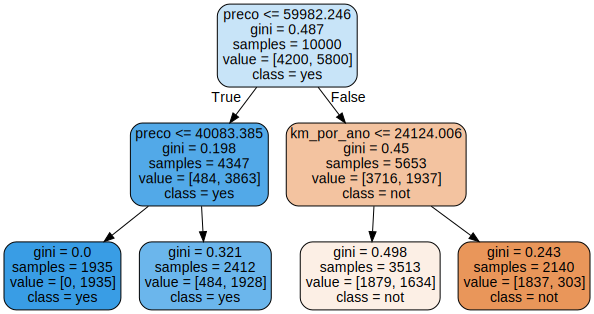

In [13]:
from sklearn.tree import export_graphviz
import graphviz

tree_model.fit(x_azar, y_azar)
dot_data = export_graphviz(
    tree_model,
    out_file=None,
    feature_names=x_azar.columns,
    class_names = ['not', 'yes'],
    filled=True,
    rounded=True
)


grafico = graphviz.Source(dot_data)
grafico

In [14]:
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

tree_model = DecisionTreeClassifier(max_depth=10)
tree_results = cross_validate(tree_model, x_azar, y_azar, cv=10, return_train_score=True)
print(f"SCORE results = {tree_results['test_score']}")

print_results(tree_results)

SCORE results = [0.752 0.782 0.772 0.761 0.758 0.755 0.808 0.762 0.77  0.783]
ACCURRACY DO MODEL FOI ENTRE   [ 73.81 (%) | 80.25 (%)]]
MEDIAN =  0.7703 ]
STD =  0.016118622769951546 ]


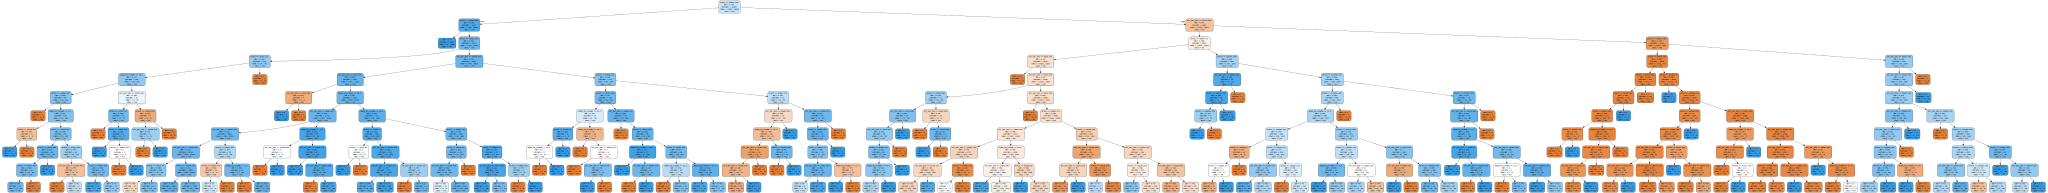

In [15]:
from sklearn.tree import export_graphviz
import graphviz

tree_model.fit(x_azar, y_azar)
dot_data = export_graphviz(
    tree_model,
    out_file=None,
    feature_names=x_azar.columns,
    class_names = ['not', 'yes'],
    filled=True,
    rounded=True
)


grafico = graphviz.Source(dot_data)
grafico

## TENTANDO DIVERSOS PARAMETROS DO MAX DEPH PARA DECISION TREE


In [16]:

def print_decision_tree(max_deph):

  SEED = 301
  np.random.seed(SEED)

  tree_model = DecisionTreeClassifier(max_depth=max_deph)
  tree_results = cross_validate(tree_model, x_azar, y_azar, cv=10, return_train_score=True)
  print(f"SCORE results = {tree_results['test_score']}")
  print(f'\033[41m {"-"*50} || TESTE COM = {max_deph} Profundidade || {"-"*50} \033[0m')
  print(f"\033[44m TAXA DE TREINO: {((tree_results['train_score'].mean())*100).round(2)} \033[0m")
  print_results(tree_results)

In [17]:
for i in range(3):
  print_decision_tree(i+1)


SCORE results = [0.744 0.759 0.763 0.765 0.754 0.742 0.771 0.748 0.764 0.768]
 -------------------------------------------------- || TESTE COM = 1 Profundidade || -------------------------------------------------- 
 TAXA DE TREINO: 75.79 
ACCURRACY DO MODEL FOI ENTRE   [ 73.83 (%) | 77.73 (%)]]
MEDIAN =  0.7578 ]
STD =  0.009734474818910375 ]
SCORE results = [0.744 0.759 0.763 0.765 0.754 0.742 0.771 0.748 0.764 0.768]
 -------------------------------------------------- || TESTE COM = 2 Profundidade || -------------------------------------------------- 
 TAXA DE TREINO: 75.79 
ACCURRACY DO MODEL FOI ENTRE   [ 73.83 (%) | 77.73 (%)]]
MEDIAN =  0.7578 ]
STD =  0.009734474818910375 ]
SCORE results = [0.786 0.804 0.786 0.79  0.778 0.759 0.812 0.782 0.777 0.796]
 -------------------------------------------------- || TESTE COM = 3 Profundidade || -------------------------------------------------- 
 TAXA DE TREINO: 78.75 
ACCURRACY DO MODEL FOI ENTRE   [ 75.87 (%) | 81.53 (%)]]
MEDIAN =  0.78

In [18]:
def retona_decision_tree_table(max_deph):

  SEED = 301
  np.random.seed(SEED)

  tree_model = DecisionTreeClassifier(max_depth=max_deph)
  tree_results = cross_validate(tree_model, x_azar, y_azar, cv=10, return_train_score=True)
  train_score = tree_results['train_score'].mean()
  test_score = tree_results['test_score'].mean()
  table = [max_deph, train_score, test_score]
  return table

In [19]:
table_results = [retona_decision_tree_table(i) for i in range(1, 3)]
table_results = pd.DataFrame(columns=['max_deph', 'train_score', 'test_score'], data=table_results)
table_results

,max_deph,train_score,test_score
0,1,0.757911,0.7578
1,2,0.757911,0.7578


In [20]:

table_results['train_score'] = table_results['train_score'].astype(np.float64)
table_results['test_score'] = table_results['test_score'].astype(np.float64)
table_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   max_deph     2 non-null      int64  
 1   train_score  2 non-null      float64
 2   test_score   2 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 176.0 bytes


In [21]:
table_results.head()

,max_deph,train_score,test_score
0,1,0.757911,0.7578
1,2,0.757911,0.7578


In [22]:
import seaborn as sns
print(sns.__version__)


0.13.2


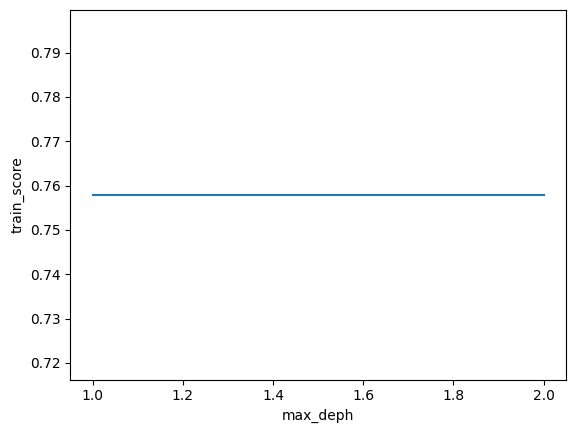

In [23]:
import seaborn as sns
grafico = sns.lineplot(data=table_results, x = table_results['max_deph'], y = table_results['train_score'])

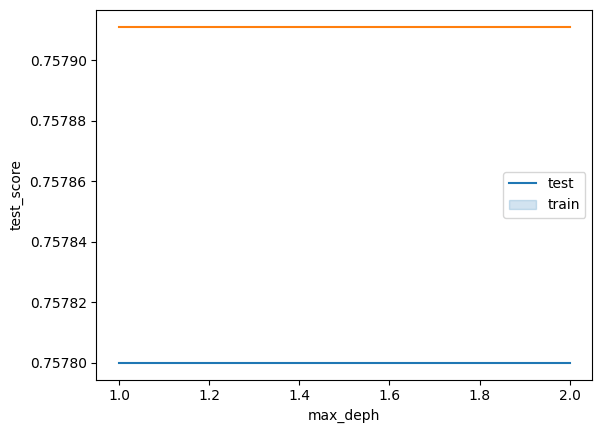

In [24]:
import matplotlib.pyplot as plt
sns.lineplot(data=table_results, x = table_results['max_deph'], y = table_results['test_score'], label='test')
sns.lineplot(data=table_results, x = table_results['max_deph'], y = table_results['train_score'], label='train')
plt.legend(['test','train'])

In [25]:
def retorna_prof_leaf_2dimensoes(max_deph, min_leaf):

  SEED = 301
  np.random.seed(SEED)

  tree_model = DecisionTreeClassifier(max_depth=max_deph, min_samples_leaf=min_leaf)
  tree_results = cross_validate(tree_model, x_azar, y_azar, cv=10, return_train_score=True)
  train_score = tree_results['train_score'].mean()
  test_score = tree_results['test_score'].mean()
  print(f'[ {max_deph} | {min_leaf} ]')
  table = [max_deph, min_leaf, train_score, test_score]
  return table

In [26]:
table_results = []
for i in range(1, 10):
  for j in range(1, 10):
    table_results.append(retorna_prof_leaf_2dimensoes(i, j))
table_results = pd.DataFrame(columns=['max_deph', 'min_samples_leaf', 'train_score', 'test_score'], data=table_results)
table_results

[ 1 | 1 ]
[ 1 | 2 ]
[ 1 | 3 ]
[ 1 | 4 ]
[ 1 | 5 ]
[ 1 | 6 ]
[ 1 | 7 ]
[ 1 | 8 ]
[ 1 | 9 ]
[ 2 | 1 ]
[ 2 | 2 ]
[ 2 | 3 ]
[ 2 | 4 ]
[ 2 | 5 ]
[ 2 | 6 ]
[ 2 | 7 ]
[ 2 | 8 ]
[ 2 | 9 ]
[ 3 | 1 ]
[ 3 | 2 ]
[ 3 | 3 ]
[ 3 | 4 ]
[ 3 | 5 ]
[ 3 | 6 ]
[ 3 | 7 ]
[ 3 | 8 ]
[ 3 | 9 ]
[ 4 | 1 ]
[ 4 | 2 ]
[ 4 | 3 ]
[ 4 | 4 ]
[ 4 | 5 ]
[ 4 | 6 ]
[ 4 | 7 ]
[ 4 | 8 ]
[ 4 | 9 ]
[ 5 | 1 ]
[ 5 | 2 ]
[ 5 | 3 ]
[ 5 | 4 ]
[ 5 | 5 ]
[ 5 | 6 ]
[ 5 | 7 ]
[ 5 | 8 ]
[ 5 | 9 ]
[ 6 | 1 ]
[ 6 | 2 ]
[ 6 | 3 ]
[ 6 | 4 ]
[ 6 | 5 ]
[ 6 | 6 ]
[ 6 | 7 ]
[ 6 | 8 ]
[ 6 | 9 ]
[ 7 | 1 ]
[ 7 | 2 ]
[ 7 | 3 ]
[ 7 | 4 ]
[ 7 | 5 ]
[ 7 | 6 ]
[ 7 | 7 ]
[ 7 | 8 ]
[ 7 | 9 ]
[ 8 | 1 ]
[ 8 | 2 ]
[ 8 | 3 ]
[ 8 | 4 ]
[ 8 | 5 ]
[ 8 | 6 ]
[ 8 | 7 ]
[ 8 | 8 ]
[ 8 | 9 ]
[ 9 | 1 ]
[ 9 | 2 ]
[ 9 | 3 ]
[ 9 | 4 ]
[ 9 | 5 ]
[ 9 | 6 ]
[ 9 | 7 ]
[ 9 | 8 ]
[ 9 | 9 ]


,max_deph,min_samples_leaf,train_score,test_score
0,1,1,0.757911,0.7578
1,1,2,0.757911,0.7578
2,1,3,0.757911,0.7578
3,1,4,0.757911,0.7578
4,1,5,0.757911,0.7578
...,...,...,...,...
76,9,5,0.799522,0.7739
77,9,6,0.799000,0.7735
78,9,7,0.798789,0.7752
79,9,8,0.798411,0.7753


<Axes: >

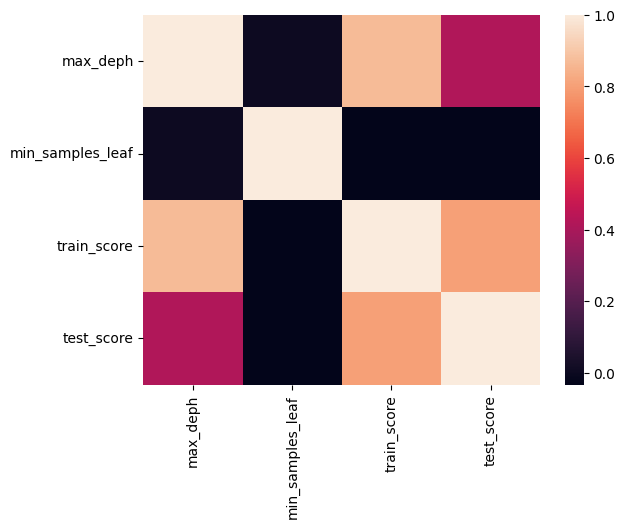

In [27]:
sns.heatmap(table_results.corr())

<Axes: >

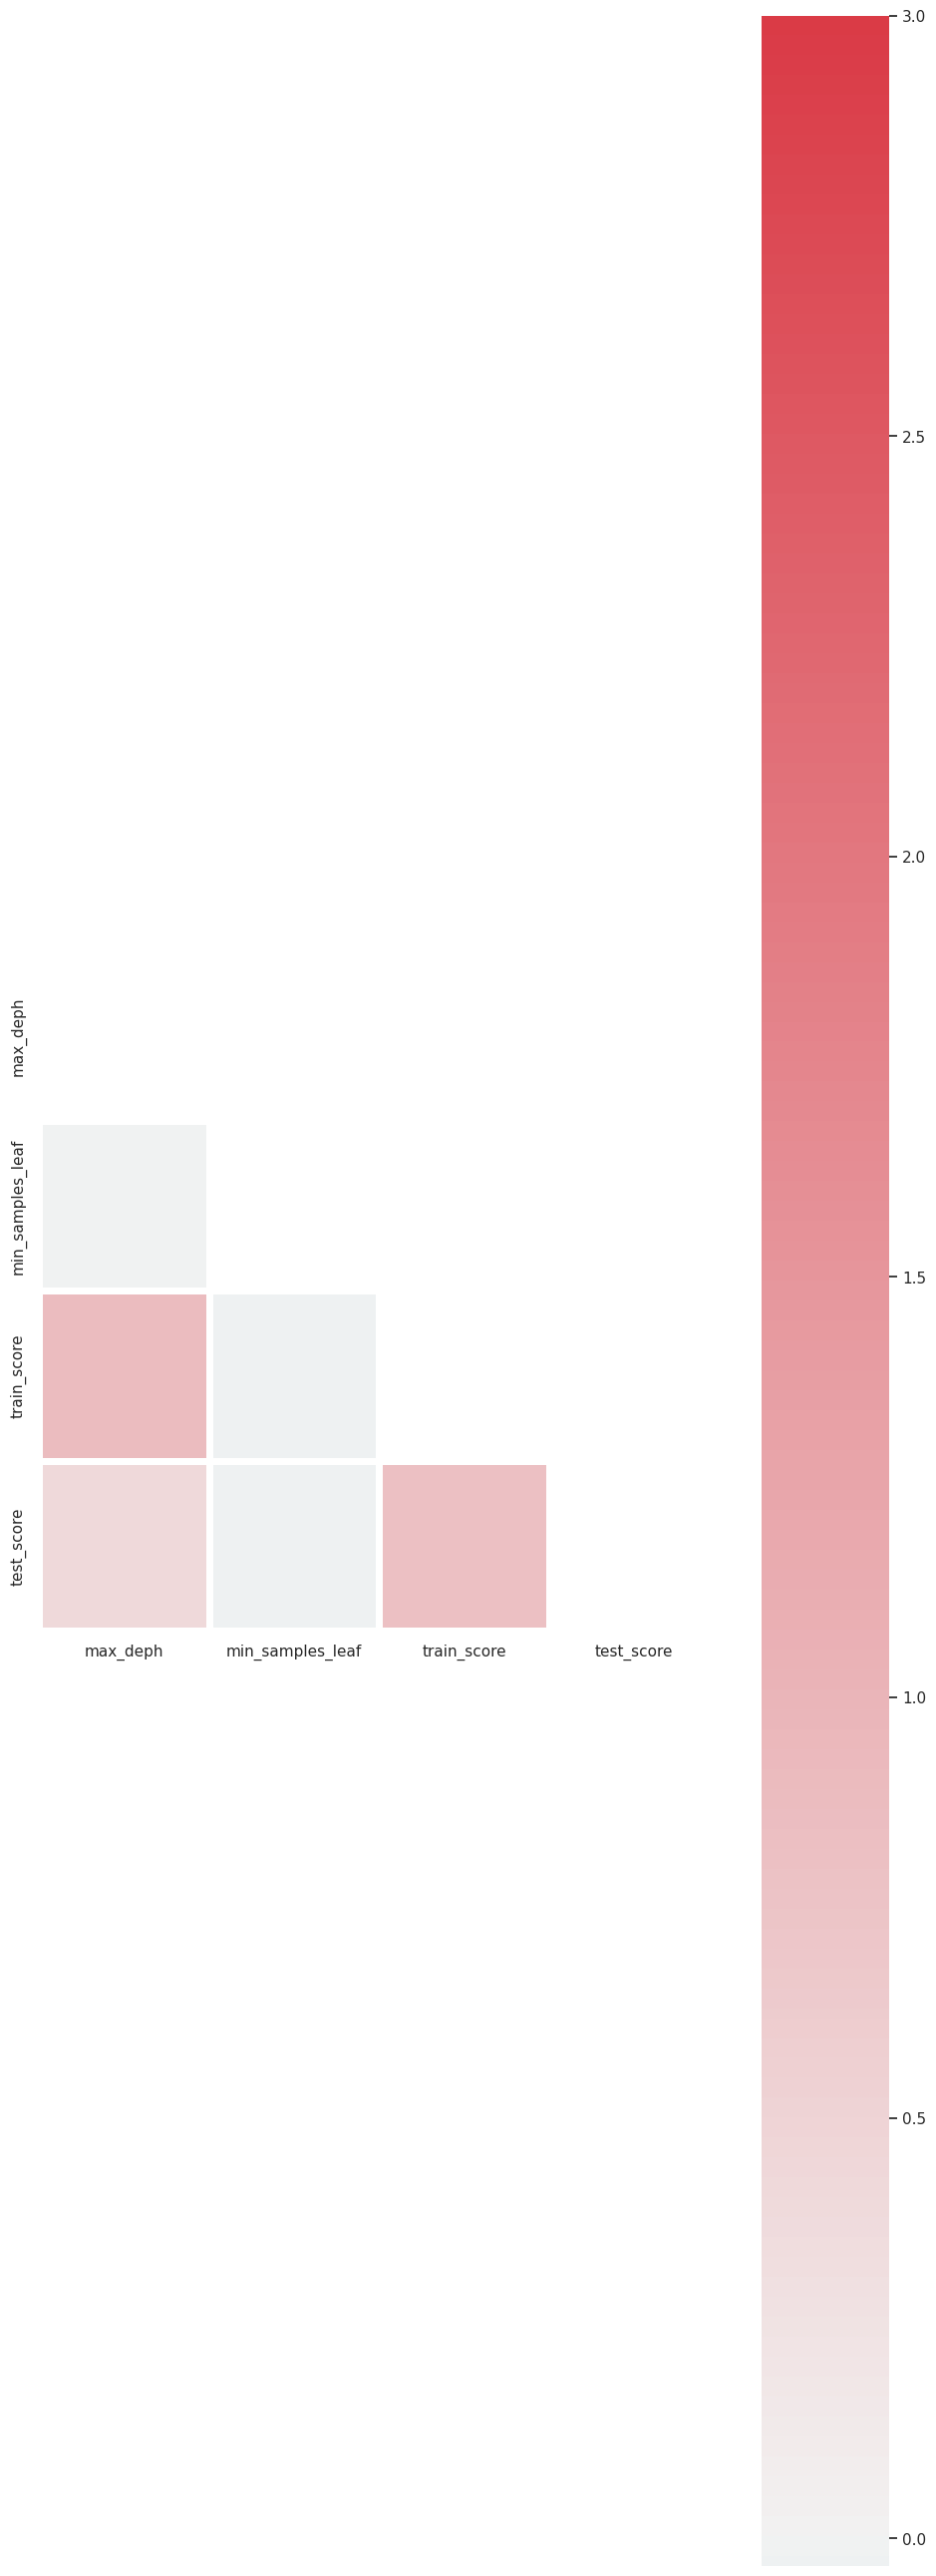

In [28]:
sns.set(style='white')
mask = np.zeros_like(table_results.corr(), dtype= bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(table_results.corr(), mask=mask, cmap=cmap, vmax=3, center=0,
            square=True, linewidths=5, cbar_kws={'shrink':5})

In [29]:
table_results.sort_values('test_score', ascending=False).head()

,max_deph,min_samples_leaf,train_score,test_score
20,3,3,0.787544,0.787
19,3,2,0.787544,0.787
18,3,1,0.787544,0.787
22,3,5,0.787522,0.787
23,3,6,0.787522,0.787


In [30]:
def retorna_decision_tree_tres_dimensoes(max_deph, min_leaf, min_sample_split):

  SEED = 301
  np.random.seed(SEED)

  tree_model = DecisionTreeClassifier(max_depth=max_deph,
                                      min_samples_leaf=min_leaf,
                                      min_samples_split=min_sample_split)
  tree_results = cross_validate(tree_model, x_azar, y_azar, cv=10, return_train_score=True)
  train_score = tree_results['train_score'].mean()
  test_score = tree_results['test_score'].mean()
  print(f'[ {max_deph} | {min_leaf} ! {min_sample_split}]')
  table = [max_deph, min_leaf, min_sample_split, train_score, test_score]
  return table

In [31]:
table_results = []
for i in range(1, 10):
  for j in range(1, 10):
    for k in [6, 12, 24, 26, 42, 48]:
      table_results.append(retorna_decision_tree_tres_dimensoes(i, j, k))
table_results = pd.DataFrame(columns=['max_deph', 'min_samples_leaf','min_sample_split', 'train_score', 'test_score'], data=table_results)
table_results

[ 1 | 1 ! 6]
[ 1 | 1 ! 12]
[ 1 | 1 ! 24]
[ 1 | 1 ! 26]
[ 1 | 1 ! 42]
[ 1 | 1 ! 48]
[ 1 | 2 ! 6]
[ 1 | 2 ! 12]
[ 1 | 2 ! 24]
[ 1 | 2 ! 26]
[ 1 | 2 ! 42]
[ 1 | 2 ! 48]
[ 1 | 3 ! 6]
[ 1 | 3 ! 12]
[ 1 | 3 ! 24]
[ 1 | 3 ! 26]
[ 1 | 3 ! 42]
[ 1 | 3 ! 48]
[ 1 | 4 ! 6]
[ 1 | 4 ! 12]
[ 1 | 4 ! 24]
[ 1 | 4 ! 26]
[ 1 | 4 ! 42]
[ 1 | 4 ! 48]
[ 1 | 5 ! 6]
[ 1 | 5 ! 12]
[ 1 | 5 ! 24]
[ 1 | 5 ! 26]
[ 1 | 5 ! 42]
[ 1 | 5 ! 48]
[ 1 | 6 ! 6]
[ 1 | 6 ! 12]
[ 1 | 6 ! 24]
[ 1 | 6 ! 26]
[ 1 | 6 ! 42]
[ 1 | 6 ! 48]
[ 1 | 7 ! 6]
[ 1 | 7 ! 12]
[ 1 | 7 ! 24]
[ 1 | 7 ! 26]
[ 1 | 7 ! 42]
[ 1 | 7 ! 48]
[ 1 | 8 ! 6]
[ 1 | 8 ! 12]
[ 1 | 8 ! 24]
[ 1 | 8 ! 26]
[ 1 | 8 ! 42]
[ 1 | 8 ! 48]
[ 1 | 9 ! 6]
[ 1 | 9 ! 12]
[ 1 | 9 ! 24]
[ 1 | 9 ! 26]
[ 1 | 9 ! 42]
[ 1 | 9 ! 48]
[ 2 | 1 ! 6]
[ 2 | 1 ! 12]
[ 2 | 1 ! 24]
[ 2 | 1 ! 26]
[ 2 | 1 ! 42]
[ 2 | 1 ! 48]
[ 2 | 2 ! 6]
[ 2 | 2 ! 12]
[ 2 | 2 ! 24]
[ 2 | 2 ! 26]
[ 2 | 2 ! 42]
[ 2 | 2 ! 48]
[ 2 | 3 ! 6]
[ 2 | 3 ! 12]
[ 2 | 3 ! 24]
[ 2 | 3 ! 26]
[ 2 | 3 ! 42]
[ 2 | 3 ! 48]
[ 2 

,max_deph,min_samples_leaf,min_sample_split,train_score,test_score
0,1,1,6,0.757911,0.7578
1,1,1,12,0.757911,0.7578
2,1,1,24,0.757911,0.7578
3,1,1,26,0.757911,0.7578
4,1,1,42,0.757911,0.7578
...,...,...,...,...,...
481,9,9,12,0.798311,0.7727
482,9,9,24,0.797867,0.7735
483,9,9,26,0.797678,0.7739
484,9,9,42,0.796289,0.7755


In [32]:
from sklearn.model_selection import GridSearchCV, KFold

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [32, 64, 128],
    'min_samples_leaf': [32, 64, 128],
    'criterion': ['gini', 'antropy']
}

busca = GridSearchCV(DecisionTreeClassifier(), espaco_de_parametros,
                     cv = KFold(n_splits=10, shuffle=True))
busca.fit(x_azar, y_azar, groups = dados.modelo)
restultados = pd.DataFrame(busca.cv_results_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _vali

In [33]:
restultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011266,0.000274,0.003508,0.000147,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1
1,0.011586,0.000563,0.003763,0.000429,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1
2,0.012039,0.001405,0.004136,0.000882,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1
3,0.011501,0.000398,0.003695,0.000393,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1
4,0.012099,0.001548,0.003944,0.001101,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.001427,0.000112,0.000000,0.000000,antropy,6,64,64,"{'criterion': 'antropy', 'max_depth': 6, 'min_...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37
68,0.001474,0.000133,0.000000,0.000000,antropy,6,64,128,"{'criterion': 'antropy', 'max_depth': 6, 'min_...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37
69,0.001683,0.000466,0.000000,0.000000,antropy,6,128,32,"{'criterion': 'antropy', 'max_depth': 6, 'min_...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37
70,0.001240,0.000448,0.000000,0.000000,antropy,6,128,64,"{'criterion': 'antropy', 'max_depth': 6, 'min_...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37


In [34]:
busca.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 32,
 'min_samples_split': 32}

In [35]:
busca.best_score_ *100

78.7

In [36]:
melhor = busca.best_estimator_

In [37]:
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [38]:
from sklearn.metrics import accuracy_score
previsoes = melhor.predict(x_azar)
accuracia = (accuracy_score(y_azar, previsoes)*100).round(2)
accuracia

78.75

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=10, shuffle=True))
scores

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _vali

array([0.772, 0.768, 0.795, 0.785, 0.789, 0.786, 0.796, 0.773, 0.813,
       0.792])

In [40]:
def imprime_resultados( results ):
  media = (results.mean() * 100).round(2)
  desvio = (results.std() * 100).round(2)
  print(f'Accuria média { media } (%)')
  print(f'Intervalo [ {media - 2*desvio}(%) | {media + 2*desvio}(%)]')

In [41]:
imprime_resultados(scores)

Accuria média 78.69 (%)
Intervalo [ 76.13(%) | 81.25(%)]


## BUSCA DE HIPERPARAMETROS

Para realizar busca de hiperparametros e encontnrar os mmelhores parametros para usar nossa analise de dados e encontrar o modelo mais arcetivos e menos viciado no teste podemos além do GridSearchCBV podemos uar o RandomizadSearchCV


In [43]:
from sklearn.model_selection import RandomizedSearchCV


SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    'max_depth': [3, 5],
    'min_samples_split': [32, 64, 128],
    'min_samples_leaf': [32, 64, 128],
    'criterion': ['gini', 'antropy']
}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                           espaco_de_parametros,
                           n_iter=16,
                           cv = KFold(n_splits=10,
                          shuffle=True))
busca.fit(x_azar, y_azar, groups = dados.modelo)
restultados = pd.DataFrame(busca.cv_results_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

In [45]:
busca.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=64)

In [48]:
busca

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_iter=16,
                   param_distributions={'criterion': ['gini', 'antropy'],
                                        'max_depth': [3, 5],
                                        'min_samples_leaf': [32, 64, 128],
                                        'min_samples_split': [32, 64, 128]})

In [51]:
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=10, shuffle=True))
scores

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

array([0.777, 0.779, 0.803, 0.775, 0.79 , 0.79 , 0.78 , 0.78 , 0.817,
       0.778])

In [53]:
def imprime_resultados( results ):
  media = (results.mean() * 100).round(2)
  desvio = (results.std() * 100).round(2)
  print(f'Accuria média { media } (%)')
  print(f'Intervalo [ {media - 2*desvio}(%) | {media + 2*desvio}(%)]')

In [56]:
imprime_resultados(scores)

Accuria média 78.69 (%)
Intervalo [ 76.11(%) | 81.27(%)]


## CUSTOMIZAR HIPER PARÂMETROS


In [57]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    'max_depth': [3, 5, 10, 11, 15, 30, None],
    'min_samples_split': randint(32, 128),
    'min_samples_leaf': randint(32, 128),
    'criterion': ['gini', 'antropy']
}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                           espaco_de_parametros,
                           n_iter=16,
                           cv = KFold(n_splits=10,
                          shuffle=True))
busca.fit(x_azar, y_azar, groups = dados.modelo)
restultados = pd.DataFrame(busca.cv_results_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

In [58]:
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=10, shuffle=True))
scores

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

array([0.778, 0.787, 0.791, 0.781, 0.803, 0.77 , 0.781, 0.77 , 0.819,
       0.791])

In [59]:
imprime_resultados(scores)

Accuria média 78.71 (%)
Intervalo [ 75.85(%) | 81.57(%)]


In [74]:
resultados_ordenados = restultados.sort_values('mean_test_score', ascending=False)
for i, row in resultados_ordenados.iterrows():
  print(f"{row.mean_test_score * 100:.2f} (%) | {row.std_test_score:.5f}(%) | {row.params})")

78.44 (%) | 0.00697(%) | {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 67})
78.04 (%) | 0.00751(%) | {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 124, 'min_samples_split': 88})
78.04 (%) | 0.00864(%) | {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 125, 'min_samples_split': 59})
78.03 (%) | 0.00943(%) | {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 100, 'min_samples_split': 84})
78.00 (%) | 0.00821(%) | {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 126, 'min_samples_split': 84})
77.99 (%) | 0.01009(%) | {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 101, 'min_samples_split': 52})
77.99 (%) | 0.00899(%) | {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 108, 'min_samples_split': 110})
77.94 (%) | 0.00967(%) | {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 103, 'min_samples_split': 96})
77.92 (%) | 0.00810(%) | {'criterion': 'gini', 'max_depth': 11, 'min_samples_le

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    'max_depth': [3, 5, 10, 11, 15, 30, None],
    'min_samples_split': randint(32, 128),
    'min_samples_leaf': randint(32, 128),
    'criterion': ['gini', 'antropy']
}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                           espaco_de_parametros,
                           n_iter=64,
                           cv = KFold(n_splits=10,
                          shuffle=True))
busca.fit(x_azar, y_azar)
restultados = pd.DataFrame(busca.cv_results_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
250 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _vali

In [76]:
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=10, shuffle=True))
scores

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
260 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
260 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _vali

array([0.779, 0.784, 0.814, 0.78 , 0.784, 0.785, 0.775, 0.774, 0.797,
       0.796])

In [81]:
imprime_resultados(scores)

Accuria média 78.68 (%)
Intervalo [ 76.34(%) | 81.02000000000001(%)]


In [80]:
resultados_ordenados = restultados.sort_values('mean_test_score', ascending=False)
for i, row in resultados_ordenados.iterrows():
  print(f"{row.mean_test_score * 100:.2f} (%) | {row.std_test_score:.5f}(%) | {row.params})")

78.70 (%) | 0.00957(%) | {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 69, 'min_samples_split': 124})
78.70 (%) | 0.00957(%) | {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 67, 'min_samples_split': 76})
78.70 (%) | 0.00957(%) | {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 63, 'min_samples_split': 88})
78.70 (%) | 0.00957(%) | {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 53, 'min_samples_split': 111})
78.37 (%) | 0.01422(%) | {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 111, 'min_samples_split': 94})
78.32 (%) | 0.01415(%) | {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 56, 'min_samples_split': 54})
78.32 (%) | 0.01415(%) | {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 67})
78.29 (%) | 0.01411(%) | {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 45, 'min_samples_split': 103})
77.94 (%) | 0.01156(%) | {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 100, 'mi

In [85]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
import time


SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    'max_depth': [3, 5],
    'n_estimators': [10, 100],
    'min_samples_split': randint(32, 128),
    'min_samples_leaf': randint(32, 128),
    'criterion': ['gini', 'antropy'],
    'bootstrap': [True, False]
}
start = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                           espaco_de_parametros,
                           n_iter=15,
                           cv = KFold(n_splits=10,
                          shuffle=True))
final = time.time()

print(f'TOTAL TEMPO = {final-start} s')
busca.fit(x_azar, y_azar)
restultados = pd.DataFrame(busca.cv_results_)

TOTAL TEMPO = 0.00026154518127441406 s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [86]:
start = time.time()
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=10, shuffle=True))
scores
final = time.time()

print(f'TOTAL TEMPO = {final-start} s')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

TOTAL TEMPO = 222.11475920677185 s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

In [102]:
print(f'TOTAL TEMPO = {((final-start)/60):.2f} min')

TOTAL TEMPO = 3.70 min


In [87]:
imprime_resultados(scores)

Accuria média 77.53 (%)
Intervalo [ 75.73(%) | 79.33(%)]


In [88]:
resultados_ordenados = restultados.sort_values('mean_test_score', ascending=False)
for i, row in resultados_ordenados.iterrows():
  print(f"{row.mean_test_score * 100:.2f} (%) | {row.std_test_score:.5f}(%) | {row.params})")

77.56 (%) | 0.01394(%) | {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50, 'n_estimators': 100})
77.53 (%) | 0.01429(%) | {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 69, 'min_samples_split': 63, 'n_estimators': 100})
77.22 (%) | 0.01483(%) | {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 57, 'min_samples_split': 73, 'n_estimators': 10})
76.89 (%) | 0.01474(%) | {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 52, 'min_samples_split': 88, 'n_estimators': 10})
76.75 (%) | 0.01637(%) | {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 102, 'min_samples_split': 46, 'n_estimators': 10})
76.46 (%) | 0.01513(%) | {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 40, 'min_samples_split': 85, 'n_estimators': 10})
nan (%) | nan(%) | {'bootstrap': False, 'criterion': 'antropy', 'max_depth': 5, 'mi

In [103]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    'max_depth': [3, 5],
    'n_estimators': randint(10, 100),
    'min_samples_split': randint(32, 128),
    'min_samples_leaf': randint(32, 128),
    'criterion': ['gini', 'antropy'],
    'bootstrap': [True, False]
}
start = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                           espaco_de_parametros,
                           n_iter=5,
                           cv = split)
final = time.time()

print(f'TOTAL TEMPO = {((final-start)/60):.2f} min')
busca.fit(x_azar, y_azar)
restultados = pd.DataFrame(busca.cv_results_)

TOTAL TEMPO = 0.00 min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [106]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_azar, y_azar, test_size=0.2, shuffle=True, stratify=y_azar)

In [108]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 3)
(2000, 3)
(8000, 1)
(2000, 1)


In [109]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.25)

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    'max_depth': [3, 5],
    'n_estimators': randint(10, 100),
    'min_samples_split': randint(32, 128),
    'min_samples_leaf': randint(32, 128),
    'criterion': ['gini', 'antropy'],
    'bootstrap': [True, False]
}
start = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                           espaco_de_parametros,
                           n_iter=5,
                           cv = split)
final = time.time()

print(f'TOTAL TEMPO = {((final-start)/60):.2f} min')
busca.fit(x_train, y_train)
restultados = pd.DataFrame(busca.cv_results_)

TOTAL TEMPO = 0.00 min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [112]:
print(f'TOTAL TEMPO = {final-start} min')

TOTAL TEMPO = 0.00014591217041015625 min


In [114]:
restultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.410326,0.0,0.029324,0.0,False,gini,5,100,50,71,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7850,0.7850,0.0,4
1,0.002082,0.0,0.000000,0.0,False,antropy,3,108,124,66,"{'bootstrap': False, 'criterion': 'antropy', '...",NaN,NaN,NaN,5
2,0.358481,0.0,0.030822,0.0,True,gini,3,62,56,62,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7875,0.7875,0.0,3
3,0.283067,0.0,0.028019,0.0,False,gini,3,80,57,51,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7885,0.7885,0.0,1
4,0.367229,0.0,0.027369,0.0,True,gini,3,101,52,66,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7880,0.7880,0.0,2


In [115]:
start = time.time()
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=10, shuffle=True))
scores
final = time.time()

print(f'TOTAL TEMPO = {final-start} s')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2 fits failed out of a total of 5.
T

TOTAL TEMPO = 13.570610761642456 s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

In [116]:
print(f'TOTAL TEMPO = {((final-start)/60):.2f} min')

TOTAL TEMPO = 0.23 min
